In [34]:
from os.path import join as pjoin
data_root = "./datasets/humanml3d/"
train_file = pjoin(data_root, "train.txt")
id_list = {'train': [], 'val': [], 'test': []}
import codecs as cs
with cs.open(train_file, "r") as f:
    for line in f.readlines():
        id_list['train'].append(line.strip())

val_file = pjoin(data_root, "val.txt")
import codecs as cs
with cs.open(val_file, "r") as f:
    for line in f.readlines():
        id_list['val'].append(line.strip())

test_file = pjoin(data_root, "test.txt")
import codecs as cs
with cs.open(test_file, "r") as f:
    for line in f.readlines():
        id_list['test'].append(line.strip())


In [35]:
for key in id_list.keys():
    print(key, len(id_list[key]))

train 23384
val 1460
test 4384


In [36]:
import random
import numpy as np
from tqdm.auto import tqdm

def extractMotion(id_list):
    data_dict = {}
    original_data_dict = {}
    count = 0
    bad_count = 0
    new_name_list = []
    length_list = []
    maxdata = 1e10
    motion_dir = pjoin(data_root, "new_joint_vecs")
    text_dir = pjoin(data_root, "texts")
    min_motion_length = 40
    for name in tqdm(id_list):
        if count > maxdata:
            break
        try:
            motion = np.load(pjoin(motion_dir, name + ".npy"))
            original_data_dict[name] = {"motion": motion}
            if (len(motion)) < min_motion_length or (len(motion) >= 200):
                bad_count += 1
                continue
            text_data = []
            flag = False
            with cs.open(pjoin(text_dir, name + ".txt")) as f:
                for line in f.readlines():
                    text_dict = {}
                    line_split = line.strip().split("#")
                    caption = line_split[0]
                    tokens = line_split[1].split(" ")
                    f_tag = float(line_split[2])
                    to_tag = float(line_split[3])
                    f_tag = 0.0 if np.isnan(f_tag) else f_tag
                    to_tag = 0.0 if np.isnan(to_tag) else to_tag

                    text_dict["caption"] = caption
                    text_dict["tokens"] = tokens
                    if f_tag == 0.0 and to_tag == 0.0:
                        flag = True
                        text_data.append(text_dict)
                    else:
                        try:
                            n_motion = motion[int(f_tag * 20):int(to_tag * 20)]
                            if (len(n_motion)) < min_motion_length or (len(n_motion) >= 200):
                                continue
                            new_name = (
                                random.choice("ABCDEFGHIJKLMNOPQRSTUVW") +
                                "_" + name)
                            while new_name in data_dict:
                                new_name = (random.choice(
                                    "ABCDEFGHIJKLMNOPQRSTUVW") + "_" +
                                            name)
                            data_dict[new_name] = {
                                "motion": n_motion,
                                "length": len(n_motion),
                                "text": [text_dict],
                            }
                            new_name_list.append(new_name)
                            length_list.append(len(n_motion))
                        except:
                            # None
                            print(line_split)
                            print(line_split[2], line_split[3], f_tag,
                                    to_tag, name)
                            # break

            if flag:
                data_dict[name] = {
                    "motion": motion,
                    "length": len(motion),
                    "text": text_data,
                }
                new_name_list.append(name)
                length_list.append(len(motion))
                # print(count)
                count += 1
                # print(name)
        except:
            pass
    print(bad_count)
    return data_dict, original_data_dict

def extractMotion2(id_list):
    data_dict = {}
    original_data_dict = {}
    split_data_dict = {}
    count = 0
    bad_count = 0
    new_name_list = []
    length_list = []
    maxdata = 1e10
    motion_dir = pjoin(data_root, "new_joint_vecs")
    text_dir = pjoin(data_root, "texts")
    min_motion_length = 40
    for name in tqdm(id_list):
        if count > maxdata:
            break
        try:
            motion = np.load(pjoin(motion_dir, name + ".npy"))
            original_data_dict[name] = {"motion": motion}
            split_data_dict[name]={"motion": motion}
            text_data = []
            flag = False
            with cs.open(pjoin(text_dir, name + ".txt")) as f:
                for line in f.readlines():
                    text_dict = {}
                    line_split = line.strip().split("#")
                    caption = line_split[0]
                    tokens = line_split[1].split(" ")
                    f_tag = float(line_split[2])
                    to_tag = float(line_split[3])
                    f_tag = 0.0 if np.isnan(f_tag) else f_tag
                    to_tag = 0.0 if np.isnan(to_tag) else to_tag

                    text_dict["caption"] = caption
                    text_dict["tokens"] = tokens
                    if f_tag == 0.0 and to_tag == 0.0:
                        flag = True
                        text_data.append(text_dict)
                    else:
                        try:
                            n_motion = motion[int(f_tag * 20):int(to_tag * 20)]
                            new_name = (
                                random.choice("ABCDEFGHIJKLMNOPQRSTUVW") +
                                "_" + name)
                            while new_name in data_dict:
                                new_name = (random.choice(
                                    "ABCDEFGHIJKLMNOPQRSTUVW") + "_" +
                                            name)
                            split_data_dict[new_name] = {
                                "motion": n_motion,
                                "length": len(n_motion),
                                "text": [text_dict],
                            }
                            new_name_list.append(new_name)
                            length_list.append(len(n_motion))

                            if (len(n_motion)) < min_motion_length or (len(n_motion) >= 200):
                                continue
                            
                            data_dict[new_name] = {
                                "motion": n_motion,
                                "length": len(n_motion),
                                "text": [text_dict],
                            }
                            # new_name_list.append(new_name)
                            # length_list.append(len(n_motion))
                        except:
                            # None
                            print(line_split)
                            print(line_split[2], line_split[3], f_tag,
                                    to_tag, name)
                            # break
            
            if (len(motion)) < min_motion_length or (len(motion) >= 200):
                bad_count += 1
                continue

            if flag:
                data_dict[name] = {
                    "motion": motion,
                    "length": len(motion),
                    "text": text_data,
                }
                new_name_list.append(name)
                length_list.append(len(motion))
                # print(count)
                count += 1
                # print(name)
        except:
            pass
    print(bad_count)
    return data_dict, original_data_dict, split_data_dict

In [ ]:
# processed data, not processed data
train_data_dict, train_all_data_dict = extractMotion(id_list['train'])
print('Train')
print('train_data_dict', len(train_data_dict))
# Frame 범위: [40, 200], split가능한 것은 split
print('train_all_data_dict', len(train_all_data_dict))

  0%|          | 0/23384 [00:00<?, ?it/s]

In [ ]:
# processed data, not processed data
train_data_dict, train_all_data_dict, train_split_data_dict = extractMotion2(id_list['train'])
print('Train')
# Frame 범위: [40, 200], split가능한 것은 split
print('train_original', len(train_all_data_dict))
print('train_split', len(train_split_data_dict))
print('train_split_filtered', len(train_data_dict))

  0%|          | 0/23384 [00:00<?, ?it/s]

1058
Train
train_original 23384
train_split 25782
train_split_filtered 24546


In [ ]:
val_data_dict, val_all_data_dict = extractMotion(id_list['val'])
print('Validation')
print('val_data_dict', len(val_data_dict))
# Frame 범위: [40, 200], split가능한 것은 split
print('val_all_data_dict', len(val_all_data_dict))

  0%|          | 0/1460 [00:00<?, ?it/s]

60
Validation
val_data_dict 1530
val_all_data_dict 1460


In [ ]:
# processed data, not processed data
val_data_dict, val_all_data_dict, val_split_data_dict = extractMotion2(id_list['val'])
print('val')
# Frame 범위: [40, 200], split가능한 것은 split
print('val_original', len(val_all_data_dict))
print('val_split', len(val_split_data_dict))
print('val_split_filtered', len(val_data_dict))

  0%|          | 0/1460 [00:00<?, ?it/s]

60
val
val_original 1460
val_split 1608
val_split_filtered 1530


In [ ]:
test_data_dict, test_all_data_dict = extractMotion(id_list['test'])
print('Test')
print('test_data_dict', len(test_data_dict))
# Frame 범위: [40, 200], split가능한 것은 split
print('test_all_data_dict', len(test_all_data_dict))

  0%|          | 0/4384 [00:00<?, ?it/s]

186
Test
test_data_dict 4648
test_all_data_dict 4384


In [ ]:
# processed data, not processed data
test_data_dict, test_all_data_dict, test_split_data_dict = extractMotion2(id_list['test'])
print('test')
# Frame 범위: [40, 200], split가능한 것은 split
print('test_original', len(test_all_data_dict))
print('test_split', len(test_split_data_dict))
print('test_split_filtered', len(test_data_dict))

  0%|          | 0/4384 [00:00<?, ?it/s]

186
test
test_original 4384
test_split 4882
test_split_filtered 4648


In [ ]:
whole_id_list = []
for d in id_list.values():
    whole_id_list.extend(d)

In [ ]:
whole_data_dict, whole_all_data_dict = extractMotion(whole_id_list)
print('Whole')
print('whole_data_dict', len(whole_data_dict))
# Frame 범위: [40, 200], split가능한 것은 split
print('whole_all_data_dict', len(whole_all_data_dict))

  0%|          | 0/29228 [00:00<?, ?it/s]

Whole
whole_data_dict 30724
whole_all_data_dict 29228


In [ ]:
# processed data, not processed data
whole_data_dict, whole_all_data_dict, whole_split_data_dict = extractMotion2(whole_id_list)
print('whole')
# Frame 범위: [40, 200], split가능한 것은 split
print('whole_original', len(whole_all_data_dict))
print('whole_split', len(whole_split_data_dict))
print('whole_split_filtered', len(whole_data_dict))

  0%|          | 0/29228 [00:00<?, ?it/s]

1304
whole
whole_original 29228
whole_split 32272
whole_split_filtered 30724


|data|original|split|filtered|
|:--:|:--:|:--:|:--:|
|train|23384|25782|24546|
|val|1460|1608|1530|
|test|4384|4882|4648|
|whole|29228|32272|30724|


In [ ]:
def badCounter(id_list):
    short_data_dict = {}
    long_data_dict = {}
    count = 0
    bad_count = 0
    new_name_list = []
    length_list = []
    maxdata = 1e10
    motion_dir = pjoin(data_root, "new_joint_vecs")
    text_dir = pjoin(data_root, "texts")
    min_motion_length = 40
    for name in tqdm(id_list):
        if count > maxdata:
            break
        try:
            motion = np.load(pjoin(motion_dir, name + ".npy"))
            if len(motion) < min_motion_length:
                short_data_dict[name] = {"motions": motion}
                bad_count += 1
            elif len(motion) >= 200:
                bad_count += 1
                long_data_dict[name]={"motions": motion}
            
        except:
            pass
    print(bad_count)
    return short_data_dict, long_data_dict

In [ ]:
train_bad_dict_short, train_bad_dict_long = badCounter(id_list['train'])
val_bad_dict_short, val_bad_dict_long = badCounter(id_list['val'])
test_bad_dict_short, test_bad_dict_long = badCounter(id_list['test'])
whole_bad_dict_short, whole_bad_dict_long = badCounter(whole_id_list)

  0%|          | 0/23384 [00:00<?, ?it/s]

1058


  0%|          | 0/1460 [00:00<?, ?it/s]

60


  0%|          | 0/4384 [00:00<?, ?it/s]

186


  0%|          | 0/29228 [00:00<?, ?it/s]

1304


In [ ]:
data_input = whole_bad_dict_short
print(len(data_input))
text_dir = pjoin(data_root, "texts")
motion_dir = pjoin(data_root, "new_joint_vecs")
min_motion_length = 40
cnt = 0
cnt2 = 0
cnt3=0
for name in data_input.keys():
    
    flag = False
    flag2 = False
    flag3 = False
    motion = np.load(pjoin(motion_dir, name + ".npy"))
    if 40 <= len(motion) < 200:
        print("ERROR!!")
        print(name)
        print(len(motion))
    with cs.open(pjoin(text_dir, name + ".txt")) as f:
        for line in f.readlines():
            text_dict = {}
            line_split = line.strip().split("#")
            caption = line_split[0]
            tokens = line_split[1].split(" ")
            f_tag = float(line_split[2])
            to_tag = float(line_split[3])
            f_tag = 0.0 if np.isnan(f_tag) else f_tag
            to_tag = 0.0 if np.isnan(to_tag) else to_tag

            text_dict["caption"] = caption
            text_dict["tokens"] = tokens
            if f_tag == 0.0 and to_tag == 0.0:
                flag=True
            else:
                n_motion = motion[int(f_tag * 20):int(to_tag * 20)]
                if (len(n_motion)) < min_motion_length:
                    flag2=True
                elif(len(n_motion) >= 200):
                    flag3 = True
                else:
                    print(f_tag, to_tag)
    if flag:
        cnt += 1
    if flag2:
        cnt2 += 1
    if flag3:
        cnt3 += 1
print(cnt)
print(cnt2)
print(cnt3)

1200
1200
108
0


데이터의 길이가 40 미만, 200 이상인 경우의 데이터를 무시하기 때문에, 혹시 하는 경우를 조사했다.  
데이터의 길이가 200보다 클 때, split에 의해 적절하게 나뉘는 경우를 생각해봤다.  
모든 데이터를 조사해본 결과, 200 이상의 긴 모션에 대해서는 [40, 200) 안으로 split된 모션이 없는것을 확인했다.  
단, (0, 40) 으로 모션이 split되는 경우는 어느정도 있기 때문에, 이는 고려사항이라고 생각된다.

Motion Mamba에서 추출한 분포는 아래와 동일하다.  
전체 데이터에 대해서 조사를 진행한 것으로 보여진다.

24546
40
199


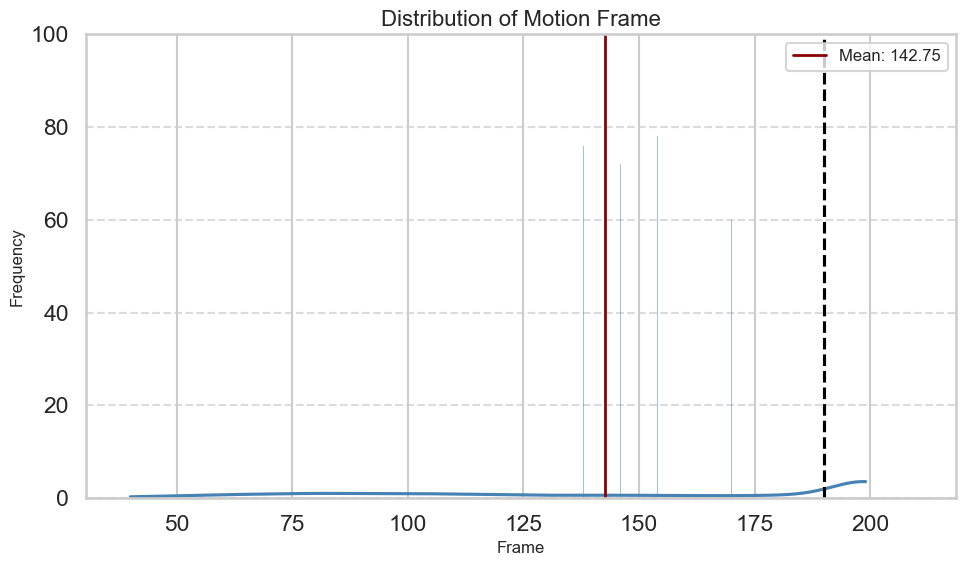

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
to_check_data = train_data_dict
motion_lengths = [v['motion'].shape[0] for v in to_check_data.values()]
print(len(to_check_data))
print(min(motion_lengths))
print(max(motion_lengths))
# plt.figure()
# plt.hist(motion_lengths, bins=50, range=(0, 500), edgecolor='k', alpha=0.7)
# plt.title('Distribution of Motion Frame')
# plt.xlabel('Frame')
# plt.ylabel('Frequency')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

plt.figure(figsize=(10, 6))  # 크기 조정
sns.histplot(
    motion_lengths, 
    bins=24546, 
    binrange=(39,210),
    kde=True,  # Kernel Density Estimation 추가
    color="steelblue", 
    edgecolor='black', 
    # alpha=0.7
)

# 수직선 추가 (예: 평균값)
mean_length = 190
plt.axvline(x=mean_length, color='black', linestyle='--')
# plt.text(
#     mean_length - 70,  # x 좌표 (평균값 기준으로 약간 오른쪽)
#     10200,            # y 좌표 (y축 상단 빈도 근처)
#     f"Frame: {mean_length}",  # 텍스트
#     color='black',           # 텍스트 색상
#     fontsize=12,             # 텍스트 크기
#     verticalalignment='center',  # 텍스트 정렬
# )
mean_length = np.mean(motion_lengths)
plt.axvline(
    x=mean_length, 
    color='darkred', 
    linestyle='-', 
    linewidth=2, 
    label=f"Mean: {mean_length:.2f}"
)
# 그래프 제목 및 레이블 설정
plt.title('Distribution of Motion Frame', fontsize=16)
plt.ylim(0, 100) 
plt.xlabel('Frame', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)  # 범례 추가
plt.tight_layout()  # 그래프 간격 자동 조정
plt.show()

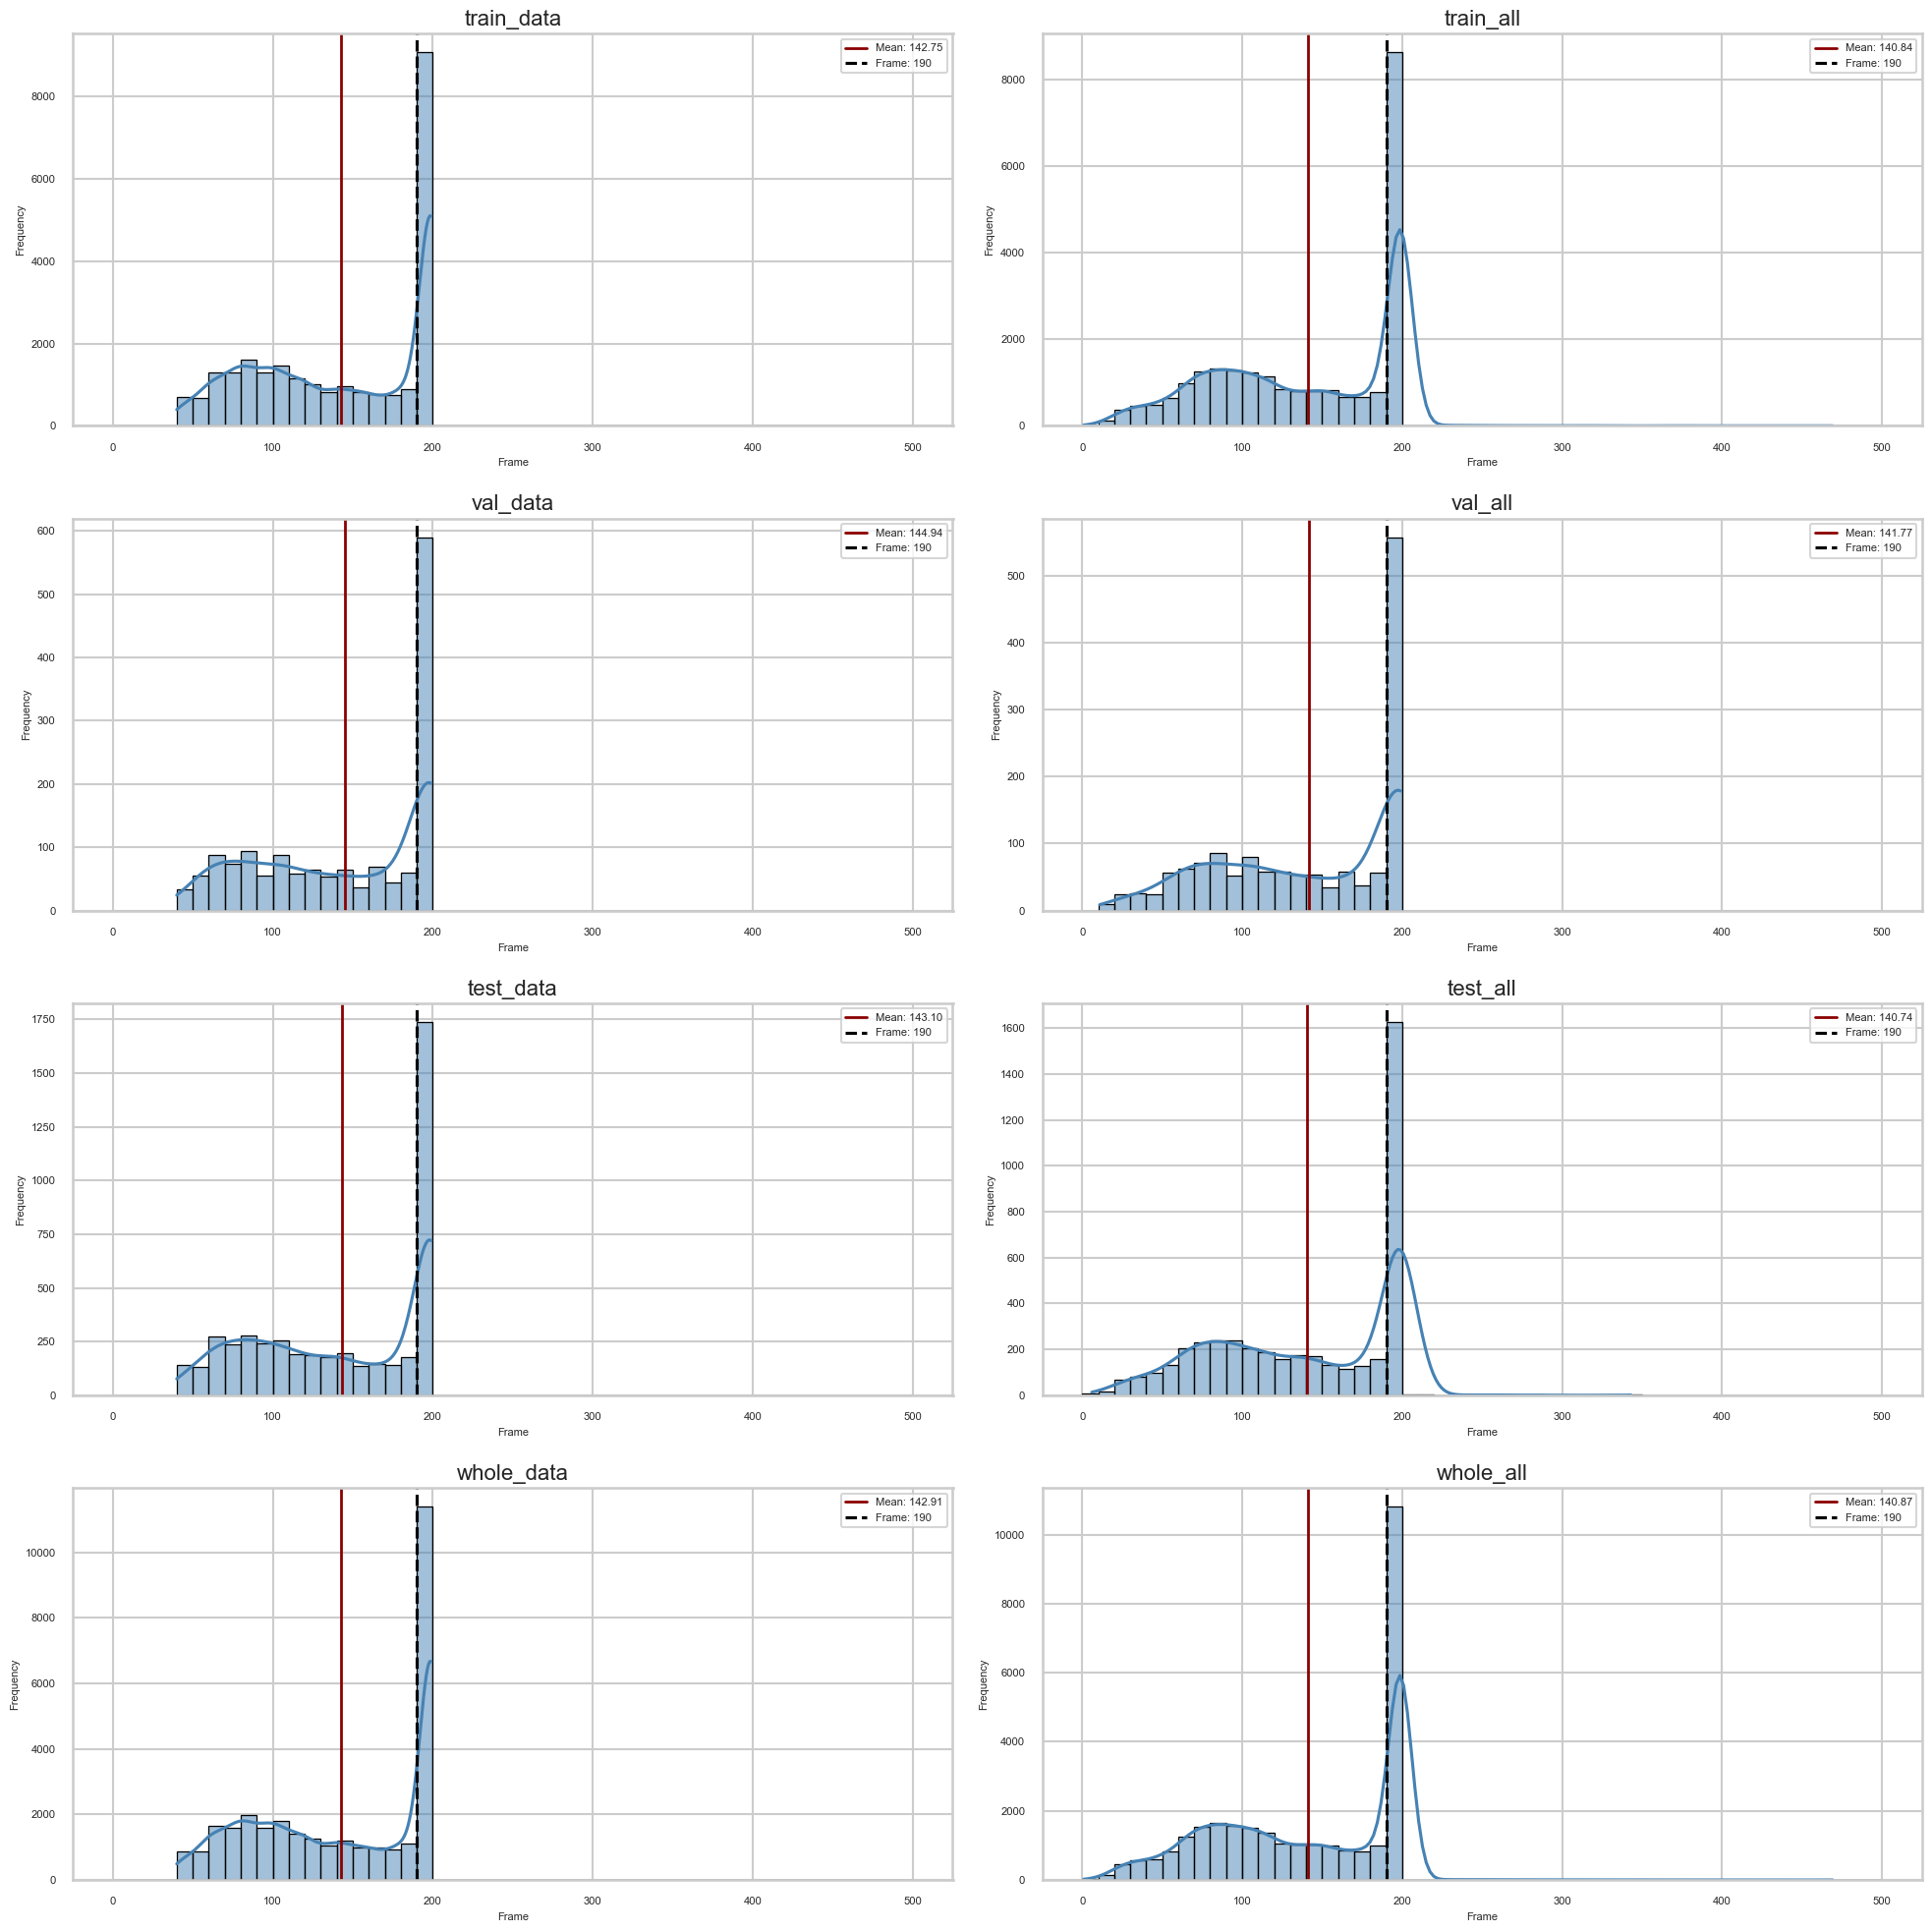

In [ ]:
data_list = [[v['motion'].shape[0] for v in train_data_dict.values()], [v['motion'].shape[0] for v in train_all_data_dict.values()], [v['motion'].shape[0] for v in val_data_dict.values()], [v['motion'].shape[0] for v in val_all_data_dict.values()], [v['motion'].shape[0] for v in test_data_dict.values()], [v['motion'].shape[0] for v in test_all_data_dict.values()], [v['motion'].shape[0] for v in whole_data_dict.values()], [v['motion'].shape[0] for v in whole_all_data_dict.values()],]
mean_list = [np.mean(data) for data in data_list]
name_list = ['train_data', 'train_all', 'val_data', 'val_all', 'test_data', 'test_all', 'whole_data', 'whole_all']
# 그래프 그리기 (서브플롯)
fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 2행 4열 레이아웃
sns.set_style("whitegrid")
sns.set_context("talk")
for i, ax in enumerate(axes.flatten()):
    motion_lengths = data_list[i]
    
    # 히스토그램 그리기
    sns.histplot(
        motion_lengths, 
        bins=50, 
        binrange=(0, 500),  # 범위 지정
        kde=True, 
        color="steelblue", 
        edgecolor='black', 
        # alpha=0.7,
        ax=ax  # 서브플롯 축 지정
    )
    
    # 평균값 계산 및 수직선 추가
    mean_length = np.mean(motion_lengths)
    ax.axvline(x=mean_length, color='darkred', linestyle='-', linewidth=2, label=f"Mean: {mean_length:.2f}")
    ax.axvline(x=190, color='black', linestyle='--', label=f"Frame: 190")  # 특정 값에 대한 수직선 추가
    
    # 그래프 제목 및 레이블 설정
    ax.set_title(f'{name_list[i]}', fontsize=16)
    ax.set_xlabel('Frame', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.legend(fontsize=8)
    
    # X축과 Y축 눈금 크기 축소
    ax.tick_params(axis='x', labelsize=8)  # X축 눈금 글자 크기 조정
    ax.tick_params(axis='y', labelsize=8)  # Y축 눈금 글자 크기 조정

# 레이아웃 최적화
plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import torch
output_dir = "./results/mld/1222_PELearn_Diff_Latent1_MEncDec49_MdiffEnc49_bs64_clip_uncond75_01/samples_2024-11-25-11-25-38/Example_50_batch0_0.npy"
dataset_dir = "./datasets/humanml3d/new_joint_vecs/000000.npy"
dataset_root = "./datasets/humanml3d/"
mean_dir = "./datasets/humanml3d/Mean.npy"
std_dir = "./datasets/humanml3d/Std.npy"

output = np.load(output_dir)
origin_vecs = np.load(dataset_dir)

In [2]:
output.shape

(50, 22, 3)

In [3]:
origin_vecs.shape

(116, 263)

In [9]:
def qinv(q):
    assert q.shape[-1] == 4, 'q must be a tensor of shape (*, 4)'
    mask = torch.ones_like(q)
    mask[..., 1:] = -mask[..., 1:]
    return q * mask

def qrot(q, v):
    """
    Rotate vector(s) v about the rotation described by quaternion(s) q.
    Expects a tensor of shape (*, 4) for q and a tensor of shape (*, 3) for v,
    where * denotes any number of dimensions.
    Returns a tensor of shape (*, 3).
    """
    assert q.shape[-1] == 4
    assert v.shape[-1] == 3
    assert q.shape[:-1] == v.shape[:-1]

    original_shape = list(v.shape)
    # print(q.shape)
    q = q.contiguous().view(-1, 4)
    v = v.contiguous().view(-1, 3)

    qvec = q[:, 1:]
    uv = torch.cross(qvec, v, dim=1)
    uuv = torch.cross(qvec, uv, dim=1)
    return (v + 2 * (q[:, :1] * uv + uuv)).view(original_shape)

def recover_root_rot_pos(data):
    rot_vel = data[..., 0]
    r_rot_ang = torch.zeros_like(rot_vel).to(data.device)
    '''Get Y-axis rotation from rotation velocity'''
    r_rot_ang[..., 1:] = rot_vel[..., :-1]
    r_rot_ang = torch.cumsum(r_rot_ang, dim=-1)

    r_rot_quat = torch.zeros(data.shape[:-1] + (4,)).to(data.device)
    r_rot_quat[..., 0] = torch.cos(r_rot_ang)
    r_rot_quat[..., 2] = torch.sin(r_rot_ang)

    r_pos = torch.zeros(data.shape[:-1] + (3,)).to(data.device)
    r_pos[..., 1:, [0, 2]] = data[..., :-1, 1:3]
    '''Add Y-axis rotation to root position'''
    r_pos = qrot(qinv(r_rot_quat), r_pos)

    r_pos = torch.cumsum(r_pos, dim=-2)

    r_pos[..., 1] = data[..., 3]
    return r_rot_quat, r_pos

def recover_from_ric(data, joints_num):
    r_rot_quat, r_pos = recover_root_rot_pos(data)
    positions = data[..., 4:(joints_num - 1) * 3 + 4]
    positions = positions.view(positions.shape[:-1] + (-1, 3))

    '''Add Y-axis rotation to local joints'''
    positions = qrot(qinv(r_rot_quat[..., None, :]).expand(positions.shape[:-1] + (4,)), positions)

    '''Add root XZ to joints'''
    positions[..., 0] += r_pos[..., 0:1]
    positions[..., 2] += r_pos[..., 2:3]

    '''Concate root and joints'''
    positions = torch.cat([r_pos.unsqueeze(-2), positions], dim=-2)

    return positions

def feats2joints(features):
    mean = np.load(mean_dir)
    std = np.load(std_dir)
    features = features * std + mean
    return recover_from_ric(features, 22)

In [10]:
# origin = np.expand_dims(origin, axis=0)
origin_vecs = torch.tensor(origin_vecs)
print(origin_vecs.shape)
rlt = feats2joints(origin_vecs)
rlt.shape

torch.Size([116, 263])


C:\Users\a\AppData\Local\Temp\ipykernel_23184\1814124203.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  origin_vecs = torch.tensor(origin_vecs)


torch.Size([116, 22, 3])

In [12]:
dataset_dir2 = "./datasets/humanml3d/new_joints/000000.npy"
origin = np.load(dataset_dir2)
origin.shape

(116, 22, 3)

HumanML3D의 animation을 사용하려면, joint type으로 변경해야 한다.  
정리 한번 들어간다. 

Joint:  
[nframe, # of joints, (x, y, z)]

Feature:  
[nframe, 263 channel]
- 263 channel은 다음과 같이 구성되어 있다.
    - root_rot_velocity (B, seq_len, 1)
    - root_linear_velocity (B, seq_len, 2)
    - root_y (B, seq_len, 1)
    - ric_data (B, seq_len, (joint_num - 1)*3) - Joint Rotation Invariant Position Represention RIC
    - rot_data (B, seq_len, (joint_num - 1)*6) - Rotation in root space
    - local_velocity (B, seq_len, joint_num*3) - Velocities in root space
    - foot_contact (B, seq_len, 4)

VAE의 output도 Feature로 나오게 된다!!